In [2]:
import sys
sys.path.append("/richmondvol1/rusty/stompy")

In [29]:
import pandas as pd
import numpy as np
from matplotlib import cm
from stompy.grid import unstructured_grid
from stompy.io.local import usgs_sfbay 
from stompy.spatial import proj_utils
from stompy import xr_transect
import xarray as xr
import matplotlib.pyplot as plt
import os
%matplotlib notebook

In [7]:
usgs_df=pd.read_csv("usgs_peterson/2022SanFranciscoBayWaterQualityData.csv",
                    parse_dates=[['Date','Time']])
f_dist="Distance from Sta. 36 (km)"

In [10]:
f_time='Date_Time'
f_station='Station'
f_dist='Distance from Sta. 36 (km)'
f_depth='Depth (m)'
f_dchl='Discrete Chlorophyll-a (micrograms/L)'
f_dchl_pheo='Discrete Chlorophyll-Pheopigment Ratio'
f_fchl='Calculated Chlorophyll-a (micrograms/L)'
f_ddo_mgl='Discrete Oxygen (mg/L)'
f_do_mgl='Oxygen (mg/L)'
f_do_sat='Oxygen % Saturation'
f_dspm='Discrete SPM (mg/L)'
f_spm='Calculated SPM (mg/L)'
f_ext='Extinction Coefficient'
f_sal='Salinity'
f_temp='Temperature (Degrees Celsius)'
f_dens='Sigma-t'
f_no2='NO2 (Micromolar)'
f_no3='NO32 (Micromolar)'
f_nh4='NH4 (Micromolar)'
f_po4='PO4 (Micromolar)'
f_si='Si (Micromolar)'

<IPython.core.display.Javascript object>


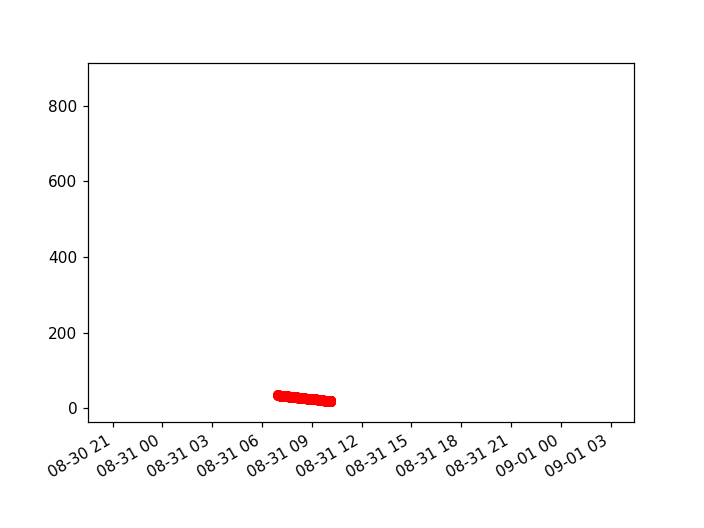

In [20]:
fig,ax=plt.subplots()
ax.plot( usgs_df[f_time], usgs_df[f_station], 'ro')
fig.autofmt_xdate()

In [11]:
usgs_idf=usgs_df.set_index(['Julian Date','Station'])
usgs_idf.head()

Date_Time  Distance from Sta. 36 (km)  \
Julian Date Station                                                   
2022025     2.0     2022-01-25 15:40:00                    127.7053   
            2.0     2022-01-25 15:40:00                    127.7053   
            2.0     2022-01-25 15:40:00                    127.7053   
            2.0     2022-01-25 15:40:00                    127.7053   
            2.0     2022-01-25 15:40:00                    127.7053   

                     Depth (m)  Discrete Chlorophyll-a (micrograms/L)  \
Julian Date Station                                                     
2022025     2.0            1.0                                    NaN   
            2.0            2.0                                    NaN   
            2.0            3.0                                    NaN   
            2.0            4.0                                    NaN   
            2.0            5.0                                    NaN   

                     Discrete Chlorophyll-Pheopigment Ratio  \
Julian Date Station                                           
2022025     2.0                                         NaN   
            2.0                                         NaN   
            2.0                                         NaN   
            2.0                                         NaN   
            2.0                                         NaN   

                     Calculated Chlorophyll-a (micrograms/L)  \
Julian Date Station                                            
2022025     2.0                                          2.1   
            2.0                                          2.0   
            2.0                                          2.0   
            2.0                                          2.0   
            2.0                                          2.0   

                     Discrete Oxygen (mg/L)  Oxygen (mg/L)  \
Julian Date Station                                          
2022025     2.0                         NaN           10.3   
            2.0                         NaN           10.3   
            2.0                         NaN           10.3   
            2.0                         NaN           10.3   
            2.0                         NaN           10.3   

                     Oxygen % Saturation  Discrete SPM (mg/L)  \
Julian Date Station                                             
2022025     2.0                     92.0                  NaN   
            2.0                     92.0                  NaN   
            2.0                     92.0                  NaN   
            2.0                     92.0                  NaN   
            2.0                     92.0                  NaN   

                     Calculated SPM (mg/L)  Extinction Coefficient  Salinity  \
Julian Date Station                                                            
2022025     2.0                         36                     3.2      0.44   
            2.0                         37                     NaN      0.46   
            2.0                         39                     NaN      0.45   
            2.0                         39                     NaN      0.47   
            2.0                         38                     NaN      0.47   

                     Temperature (Degrees Celsius)  Sigma-t  NO2 (Micromolar)  \
Julian Date Station                                                             
2022025     2.0                              10.37     0.01               NaN   
            2.0                              10.37     0.03               NaN   
            2.0                              10.37     0.03               NaN   
            2.0                              10.37     0.04               NaN   
            2.0                              10.37     0.04               NaN   

                     NO32 (Micromolar)  NH4 (Micromolar)  PO4 (Micromolar)  \
Julian Date Station            

In [18]:
dist_max=55.0 # s18 is 54.94km
# It's possible that some stations have multiple casts on a single day
# but I didn't see any of that on these dates 
plot_dates=[ np.datetime64("2022-08-10"),
             np.datetime64("2022-08-19"),
             np.datetime64("2022-08-31") ]


In [22]:
usgs_df_sel=usgs_df[ (usgs_df[f_time]>np.datetime64("2022-08-10 00:00"))
                    &(usgs_df[f_time]<np.datetime64("2022-09-01 00:00"))
                    &(usgs_df[f_dist]<dist_max)]
usgs_df_sel=usgs_df_sel.set_index(['Julian Date','Station'])

In [23]:
usgs_df_sel.head()

Date_Time  Distance from Sta. 36 (km)  \
Julian Date Station                                                   
2022222     18.0    2022-08-10 10:27:00                     54.9481   
            18.0    2022-08-10 10:27:00                     54.9481   
            18.0    2022-08-10 10:27:00                     54.9481   
            18.0    2022-08-10 10:27:00                     54.9481   
            18.0    2022-08-10 10:27:00                     54.9481   

                     Depth (m)  Discrete Chlorophyll-a (micrograms/L)  \
Julian Date Station                                                     
2022222     18.0           1.0                                    NaN   
            18.0           2.0                                   17.0   
            18.0           3.0                                    NaN   
            18.0           4.0                                    NaN   
            18.0           5.0                                    NaN   

                     Discrete Chlorophyll-Pheopigment Ratio  \
Julian Date Station                                           
2022222     18.0                                        NaN   
            18.0                                       0.86   
            18.0                                        NaN   
            18.0                                        NaN   
            18.0                                        NaN   

                     Calculated Chlorophyll-a (micrograms/L)  \
Julian Date Station                                            
2022222     18.0                                        17.1   
            18.0                                        17.0   
            18.0                                        17.0   
            18.0                                        16.9   
            18.0                                        17.0   

                     Discrete Oxygen (mg/L)  Oxygen (mg/L)  \
Julian Date Station                                          
2022222     18.0                        NaN            7.9   
            18.0                        NaN            7.9   
            18.0                        NaN            7.9   
            18.0                        NaN            7.9   
            18.0                        NaN            7.9   

                     Oxygen % Saturation  Discrete SPM (mg/L)  \
Julian Date Station                                             
2022222     18.0                   100.0                  NaN   
            18.0                   100.0                 12.7   
            18.0                    99.0                  NaN   
            18.0                    99.0                  NaN   
            18.0                    99.0                  NaN   

                     Calculated SPM (mg/L)  Extinction Coefficient  Salinity  \
Julian Date Station                                                            
2022222     18.0                         9                    1.02     32.57   
            18.0                         9                     NaN     32.57   
            18.0                        10                     NaN     32.57   
            18.0                        10                     NaN     32.57   
            18.0                        10                     NaN     32.57   

                     Temperature (Degrees Celsius)  Sigma-t  NO2 (Micromolar)  \
Julian Date Station                                                             
2022222     18.0                             16.98    23.66               NaN   
            18.0                             16.98    23.66              1.01   
            18.0                             16.98    23.66               NaN   
            18.0                             16.98    23.66               NaN   
            18.0                             16.98    23.66               NaN   

                     NO32 (Micromolar)  NH4 (Micromolar)  PO4 (Micromolar)  \
Julian Date Station            

In [30]:
fig_dir="figs_usgs_profiles"
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

<IPython.core.display.Javascript object>


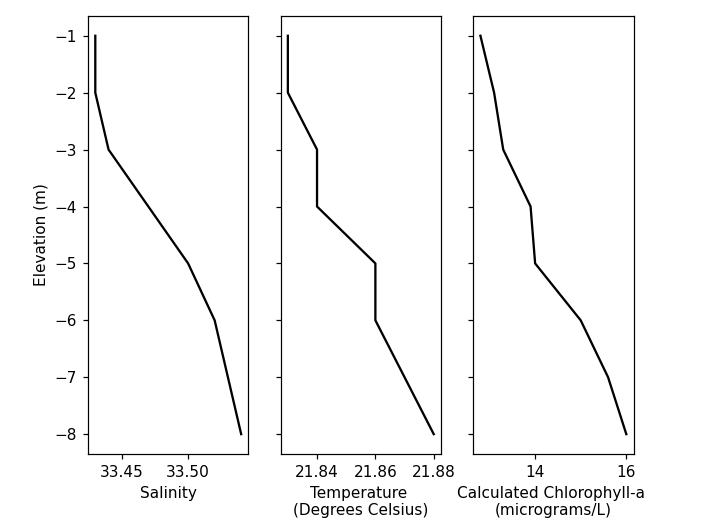

In [36]:
# Per cast plots

for jdate_station in usgs_df_sel.index.unique():
    profile_data=usgs_df_sel.loc[jdate_station]
profile_data

fields=[f_sal,f_temp,f_fchl]
fig,axs=plt.subplots(1,len(fields),sharey=True)

for fld,ax in zip(fields,axs):
    ax.plot(profile_data[fld],-profile_data[f_depth],'k-')
    ax.set_xlabel(fld.replace('(','\n('))
    
axs[0].set_ylabel('Elevation (m)')
fig.subplots_adjust(top=0.97,bottom=0.14)

In [82]:
# Prep for map figure
# Grab a shoreline
ll2utm=proj_utils.mapper('WGS84','EPSG:26910')
grid=unstructured_grid.UnstructuredGrid.read_dfm("/richmondvol1/rusty/stompy/test/data/lsb_combined_v14_net.nc")
poly=grid.boundary_polygon()
from stompy.plot import plot_wkb

INFO:UnstructuredGrid:Warning, boundary_polygon() failed using edges!  Trying polygon union method


maybe hit a dead end -- boundary maybe not closed
edge centered at [ 578986.34068143 4144518.94183115] traversed twice


<IPython.core.display.Javascript object>


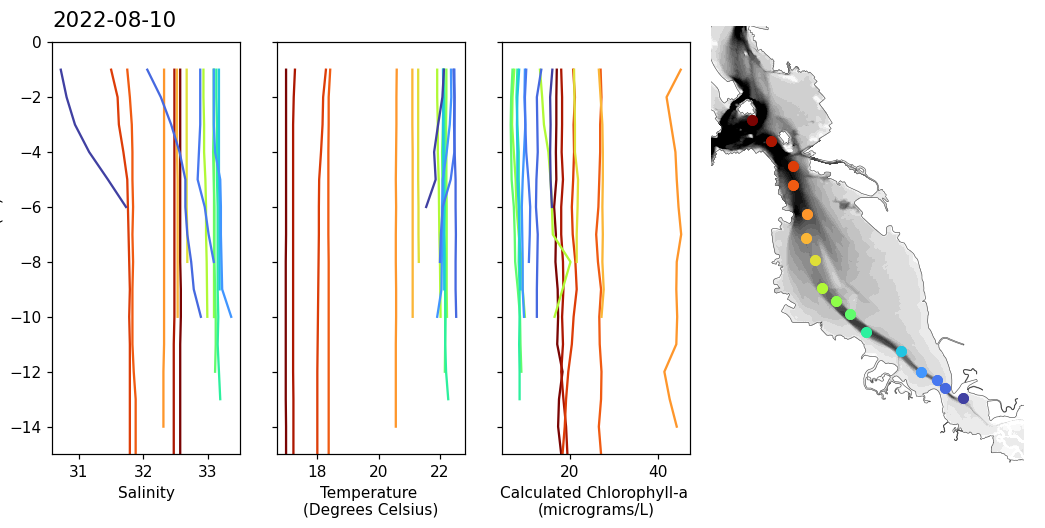

<IPython.core.display.Javascript object>


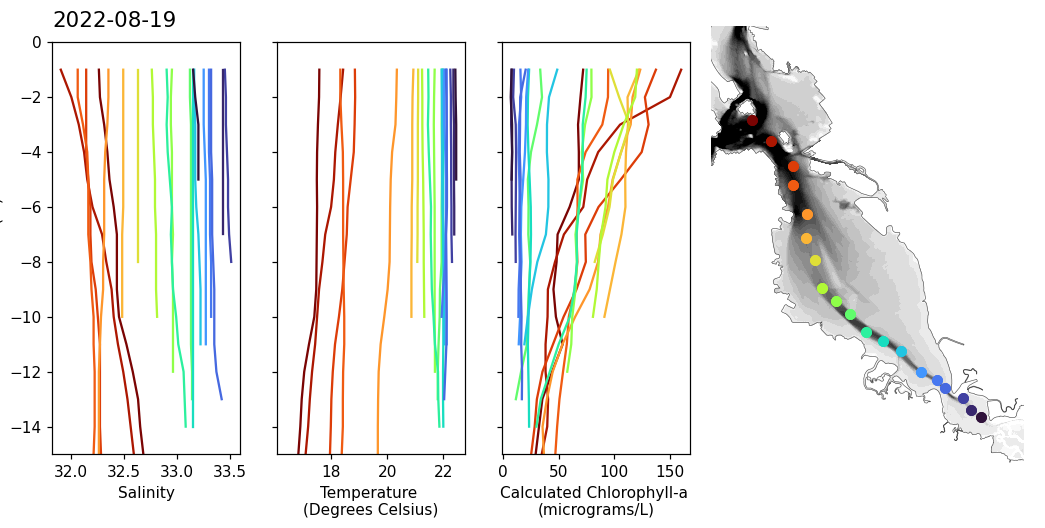

<IPython.core.display.Javascript object>


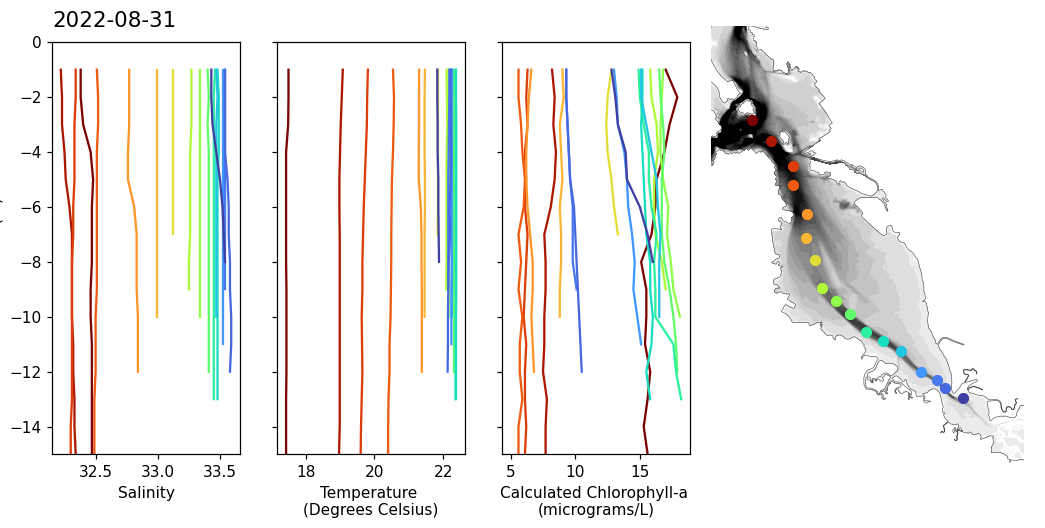

In [87]:
# Per cruise plots
    
def plot_profile_collection(profiles,show_map=True):
    fields=[f_sal,f_temp,f_fchl]
    if show_map:
        size=(9.5,4.8)
    else:
        size=(6.4,4.8)

    fig,axs=plt.subplots(1,len(fields),sharey=True, figsize=size)

    fig.subplots_adjust(top=0.92,bottom=0.14)
    if show_map:
        fig.subplots_adjust(right=0.66,left=0.05)
        ax_map=fig.add_axes([0.68,0.05,0.3,0.9])
        ax_map.axis('off')
        ax_map.axis('equal')
        grid.contourf_node_values(grid.nodes['depth'],np.linspace(-20,2,20),
                                  cmap='gray',ax=ax_map,zorder=-1,extend='both')
        plot_wkb.plot_wkb(poly,fc='none',ec='0.3',lw=0.4)
    
    for fld,ax in zip(fields,axs):
        for stn in profiles.index.get_level_values(1).unique():
            samples=profiles.loc[(jdate,stn),:]
            color=cm.turbo(samples[f_dist].min()/dist_max)
            ax.plot(samples[fld],-samples[f_depth],color=color)
            if show_map:
                ll=usgs_sfbay.station_number_to_lonlat(stn)
                xy=ll2utm(ll)
                ax_map.plot(xy[0],xy[1],'o',color=color)
        ax.set_xlabel(fld.replace('(','\n('))

    axs[0].set_ylabel('Elevation (m)')
    axs[0].axis(ymin=-15,ymax=0) # focus on the surface

    if show_map:
        ax_map.axis( (545051.7, 588712.4, 4135802.2, 4201982.65) )
    fig.text(0.05,0.98,profiles[f_time].min().strftime("%Y-%m-%d"),
             fontsize=14,va='top')
    return fig

        
        

for jdate in usgs_df_sel.index.get_level_values(0).unique():
    profiles=usgs_df_sel.loc[(jdate,slice(None)),:]
    fig=plot_profile_collection(profiles)
    img_fn=f"southbay_profiles-{profiles[f_time].min().strftime('%Y-%m-%d')}.png"
    fig.savefig(os.path.join(fig_dir,img_fn))


In [167]:
def plot_cruise_contours(profiles):
    fields=[f_sal,f_temp,f_fchl]

    ds=casts_to_transect(profiles,f_dist,f_depth)
    ds.z_ctr.values *= -1

    fig,axs=plt.subplots(len(fields),1,sharex=True, 
                         figsize=(7.5,2+len(fields)*4./3))

    for fld,ax in zip(fields,axs):
        cset=xr_transect.contourf(ds,fld,20,ax=ax,cmap='turbo')
        plt.colorbar(cset,ax=ax)
        ax.text(0.01,0.02, fld,transform=ax.transAxes)

        ax.set_ylabel('z (m)')
        ax.axis(xmin=0,xmax=dist_max,ymin=-15,ymax=0) # focus on the surface


    fig.text(0.05,0.98,profiles[f_time].min().strftime("%Y-%m-%d"),
             fontsize=14,va='top')
    return fig


<IPython.core.display.Javascript object>


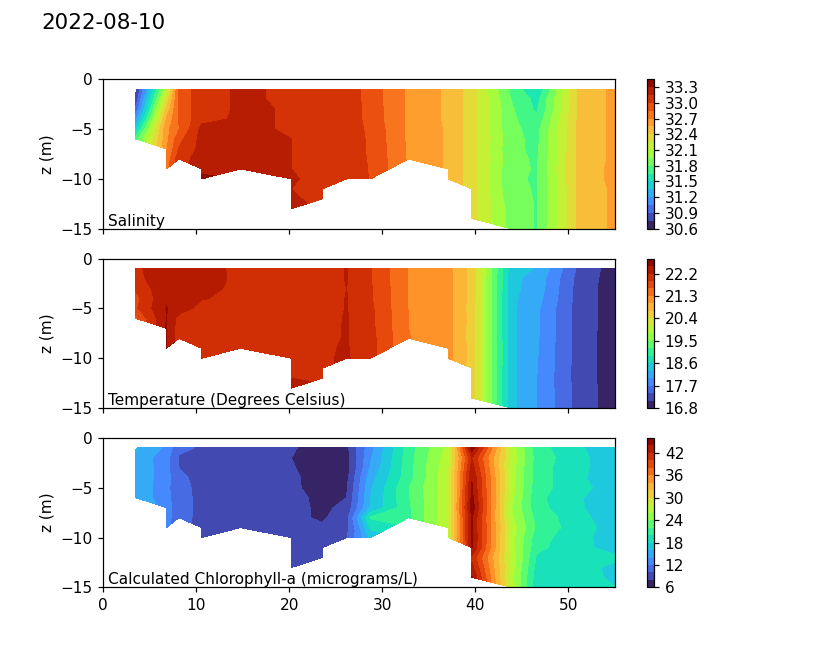

<IPython.core.display.Javascript object>


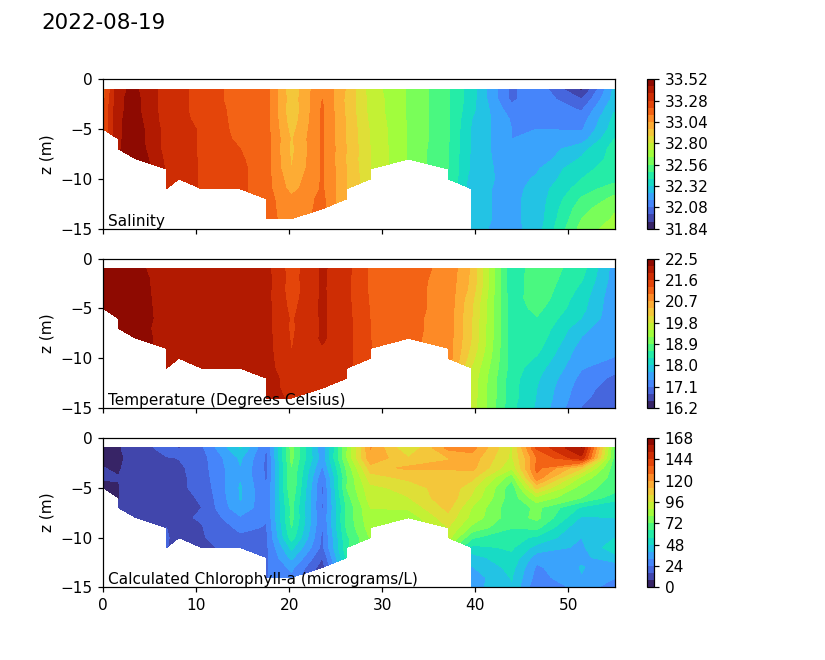

<IPython.core.display.Javascript object>


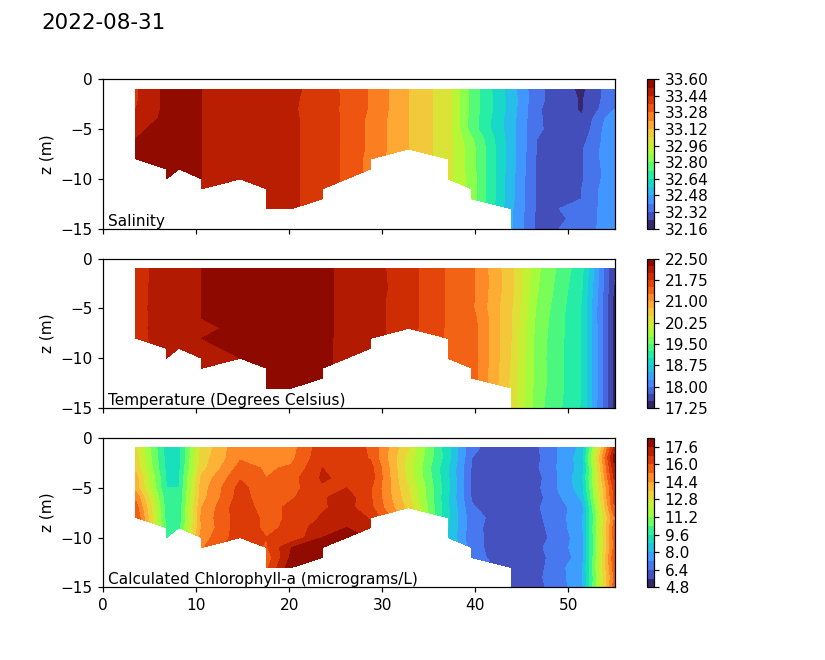

In [168]:
# x-z contour plots of the same
for jdate in usgs_df_sel.index.get_level_values(0).unique():
    profiles=usgs_df_sel.loc[(jdate,slice(None)),:]
    fig=plot_cruise_contours(profiles)
    img_fn=f"southbay_contours-{profiles[f_time].min().strftime('%Y-%m-%d')}.png"
    fig.savefig(os.path.join(fig_dir,img_fn))